# Optimal Desired Retention

## Minimum Workload

  0%|          | 0/8 [00:00<?, ?it/s]

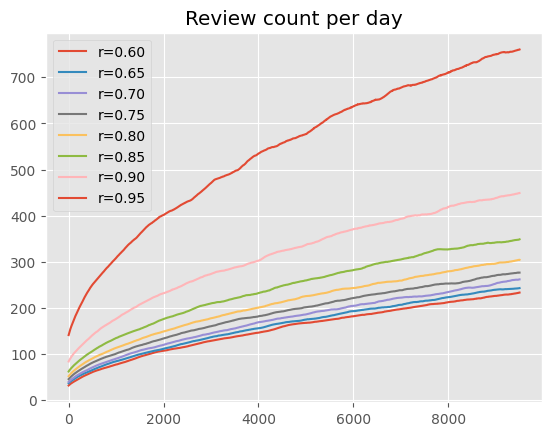

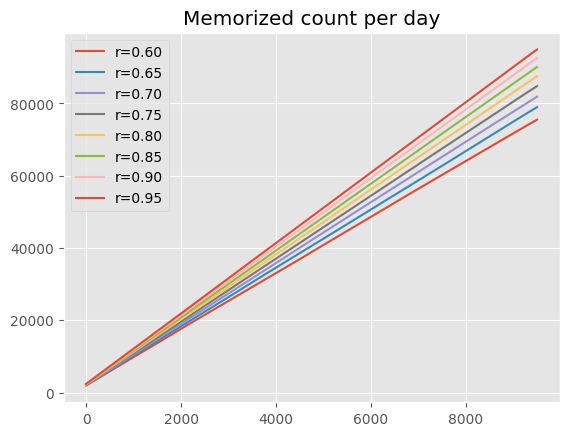

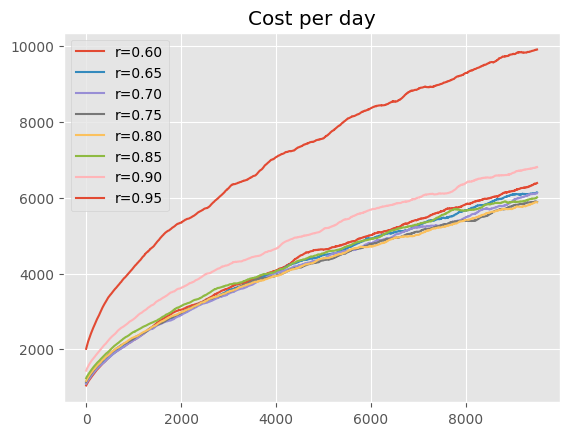

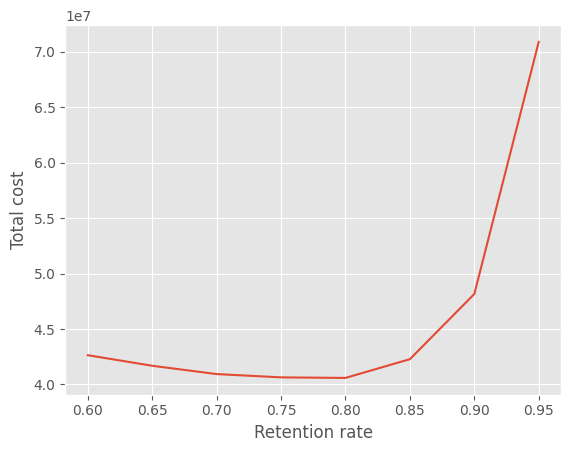

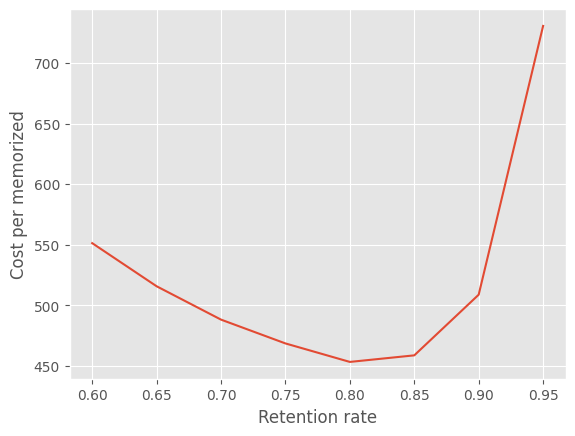

[42635754.0, 41684544.0, 40935882.0, 40639536.0, 40589534.0, 42278994.0, 48155180.0, 70870390.0]


In [1]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from fsrs_optimizer import simulate, DEFAULT_WEIGHT

learn_span = 10000
new_card_per_day = 10

plt.style.use('ggplot')

def moving_average(data, window_size=learn_span // 20):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode="valid")

total_cost = []
cost_per_memorized = []

for r in tqdm(np.linspace(0.6, 0.95, 8)):
    random.seed(42)
    np.random.seed(42)
    (_, review_cnt_per_day, learn_cnt_per_day, memorized_cnt_per_day, cost_per_day) = simulate(
        DEFAULT_WEIGHT,
        request_retention=r,
        deck_size=learn_span*new_card_per_day,
        learn_span=learn_span,
        max_cost_perday=math.inf,
        learn_limit_perday=new_card_per_day,
    )
    plt.figure(1)
    plt.plot(moving_average(review_cnt_per_day), label=f'r={r:.2f}')
    plt.figure(2)
    plt.plot(moving_average(memorized_cnt_per_day), label=f'r={r:.2f}')
    plt.figure(3)
    plt.plot(moving_average(cost_per_day), label=f'r={r:.2f}')
    total_cost.append(sum(cost_per_day))
    cost_per_memorized.append(sum(cost_per_day) / memorized_cnt_per_day[-1])

plt.figure(1)
plt.legend()
plt.title('Review count per day')
plt.figure(2)
plt.legend()
plt.title('Memorized count per day')
plt.figure(3)
plt.legend()
plt.title('Cost per day')
plt.figure(4)
plt.plot(np.linspace(0.6, 0.95, 8), total_cost)
plt.xlabel('Retention rate')
plt.ylabel('Total cost')
plt.figure(5)
plt.plot(np.linspace(0.6, 0.95, 8), cost_per_memorized)
plt.xlabel('Retention rate')
plt.ylabel('Cost per memorized')
plt.show()
print(total_cost)

## Maximum Memorization

  0%|          | 0/8 [00:00<?, ?it/s]

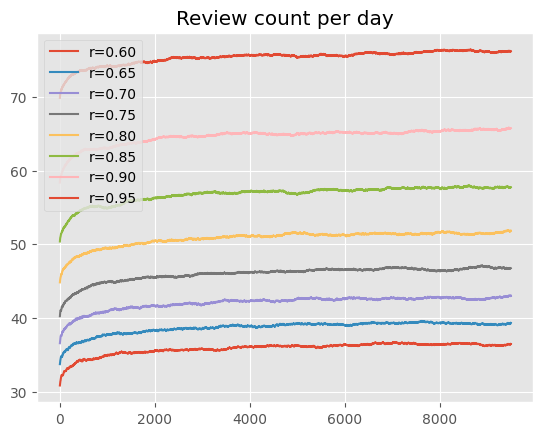

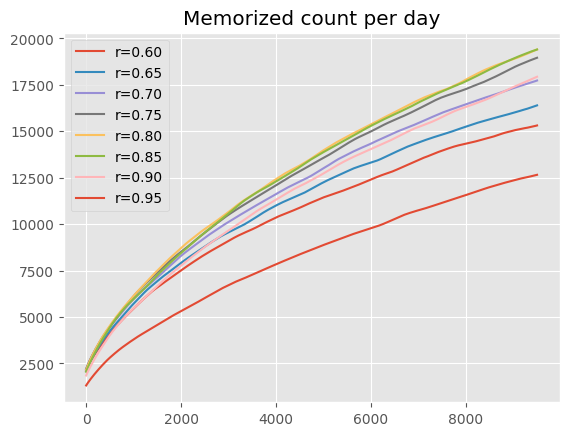

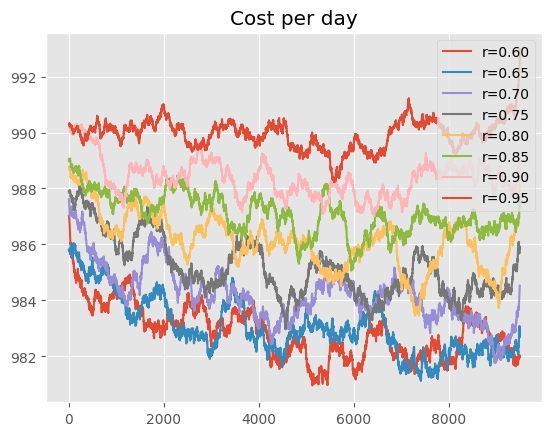

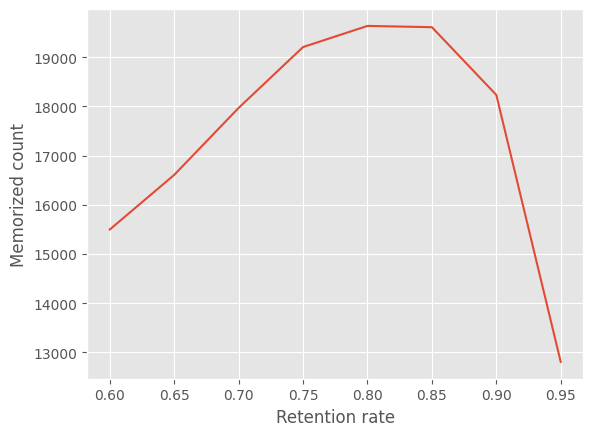

[15497.143035423405, 16607.026033029593, 17968.751543984774, 19205.06864863715, 19634.653689319028, 19608.84796451938, 18232.36663490955, 12805.290200523323]


In [2]:
max_cost_perday = 1000

memorization = []

for r in tqdm(np.linspace(0.6, 0.95, 8)):
    random.seed(42)
    np.random.seed(42)
    (_, review_cnt_per_day, learn_cnt_per_day, memorized_cnt_per_day, cost_per_day) = simulate(
        DEFAULT_WEIGHT,
        request_retention=r,
        deck_size=36500,
        learn_span=learn_span,
        max_cost_perday=max_cost_perday,
    )
    plt.figure(1)
    plt.plot(moving_average(review_cnt_per_day), label=f'r={r:.2f}')
    plt.figure(2)
    plt.plot(moving_average(memorized_cnt_per_day), label=f'r={r:.2f}')
    plt.figure(3)
    plt.plot(moving_average(cost_per_day), label=f'r={r:.2f}')
    memorization.append(memorized_cnt_per_day[-1])

plt.figure(1)
plt.legend()
plt.title('Review count per day')
plt.figure(2)
plt.legend()
plt.title('Memorized count per day')
plt.figure(3)
plt.legend()
plt.title('Cost per day')
plt.figure(4)
plt.plot(np.linspace(0.6, 0.95, 8), memorization)
plt.xlabel('Retention rate')
plt.ylabel('Memorized count')
plt.show()
print(memorization)